## Code submission

If you would like to use Jupyter (perhaps the easiest way, this replaces the old IJuliaNotebook), just submit the notebook file. Name it as p(Homework#).ipynb.  For instance, for homework 1, name it as p1.ipynb. I suggest everyone use the latest version of Julia (current stable version **v0.7.0**. Please **DO NOT** use v1.0.0 **unless you know what you are doing**).  

If you use MATLAB or Julia/Python (not the notebook), name your main program as p(Homework#)_(Problem#).m. For instance, for homework 1, problem 2, name it as p1_2.m (or p1_2.jl,p1_2.py). 

For proof-related problems, type your solution using **LaTeX (no other format is accepted)**. You do not need to write down every step of the derivation, but make sure the logic is clear.  

For implementation based problems, the problem description may not include all the information for the answer to be uniquely defined. For instance, your answer might depend on the choice of the mesh size. This is OK.

E-mail the codes above, and **any supporting files** for the homework to bCourses

You can **either** name it as

lastname_firstname_1.ipynb (if you **only** have a notebook file)

**or**

lastname_firstname_1.zip (if you have **more than one** files)

## Problem 1

Derive explicitly the four-step Adams-Moulton method.

**Solution:** 


The Standard form of the AM4 method reads
\begin{equation}
u_{n+4}-u_{n+3} = h\sum_{k = 0}^{4}\beta_{k}f(u_{n+k},t_{n+k})
\end{equation}

Construct the Lagrange interpolation polynomials as
\begin{equation}
P_k(t) = \prod_{j = 0, j \ne k}^4 \frac{(t - t_{n + j})}{(t_{n + k} - t_{n + j})} \text{ where } k = \{0,1,2,3,4\}\\ 
\tilde{f}(t) = \sum_{k = 0}^{4} f_{n + k}P_{k}(t) \approx f(t)
\end{equation}

Then the AM4 method becomes
\begin{align*}
u_{n+4}-u_{n+3} &= h\sum_{k = 0}^{4}\beta_{k}f(u_{n+k},t_{n+k})\\
&= \int_{t_{n+3}}^{t_{n+4}} f(u(s),s)\mathrm ds\\
&= \int_{t_{n+3}}^{t_{n+4}} \sum_{k = 0}^{4} f_{n + k}P_{k}(s)\mathrm ds
\end{align*}

Assuming uniform time discretization, we have
\begin{equation}
\beta_{k} = \frac{1}{h} \int_{t_{n+3}}^{t_{n+4}} P_{k}(s)\mathrm ds \\ \text{ where } k = \{0,1,2,3,4\}
\end{equation}

Explicitly, $\beta$ will be:
\begin{align*}
\beta_{k} &= \frac{1}{h} \int_{t_{n+3}}^{t_{n+4}} P_{k}(s)\mathrm ds\\
&= \int_{0}^{1} P_k(t_{n+k-1} + \theta h) \mathrm d\theta\\
&= \int_{0}^{1} \prod_{j = 0\\j \ne k}^4 \frac{(r - 1 - j + \theta)}{(k - j)}\mathrm d\theta\\  
\end{align*}

Each $\beta$ value can be calculated:
\begin{align*}
\beta_{0} &= -\frac{19}{720} \\
\beta_{1} &= \frac{53}{360} \\
\beta_{2} &= -\frac{11}{30} \\
\beta_{3} &= \frac{323}{360} \\
\beta_{4} &= \frac{251}{720} \\
\end{align*}

Hence, AM4 method:
\begin{equation}
u_{n+4}-u_{n+3} = h(\frac{251}{720}f(u_{n+4},t_{n+4}) + \frac{323}{360}f(u_{n+3},t_{n+3}) - \frac{11}{30}f(u_{n+2},t_{n+2}) + \frac{53}{360}f(u_{n+1},t_{n+1}) - \frac{19}{720}f(u_{n},t_{n}))
\end{equation}

## Problem 2

The $r$-step Nystrom method is given as follows: Replace $f(u(t),t)$ in the exact formulation below

$$u(t_{n+r})-u(t_{n+r-2}) = \int_{t_{n+r-2}}^{t_{n+r}} f(u(t),t) dt$$

by a Lagrange polynomial interpolating at $f_{n},\ldots,f_{n+r}$, where $f_{n+s}\equiv f(u_{n+s},t_{n+s})$. The explicit scheme similar to Adams-Bashforth method is called the Nystrom method.  The implicit scheme similar to Adams-Moulton method is called the Milne method.

a) Derive the Nystrom method with $r=1$ and $r=2$. Prove that both result in the same method, and prove that this is a second order method.

b) Derive the Milne method with $r=2$, and prove that this is a fourth order method.

**NOTE**: For this problem you only need to show the LTE is of the correct order.

**Solution:**

a) For Nystrom method, $r=1$ gives

$$u_{n+1}-u_{n-1} = 2h f_n.$$

$r=2$ gives

$$u_{n+2}-u_{n} = 2h \left(\int_0^1 p_0(\theta) d\theta\right) f_n + 2h \left(\int_0^1 p_1(\theta) d\theta\right) f_{n+1}.$$

Here $p_0(\theta) = 1-2\theta, p_1(\theta) = 2\theta$. 

Hence the scheme for $r=2$ is

$$u_{n+2}-u_{n} = 2h f_{n+1},$$

which is the same as the scheme for $r=1$.

Check LTE: 

$$\rho(1+z)-ln(1+z)\sigma(1+z)=z^2+2z-\left(z-z^2/2+z^3/3+O(z^4)\right)(2+2z) = \frac{z^3}{3}+O(z^4).$$

This is a second order method.

b) For Milne method, $r=2$ gives

$$u_{n+2}-u_{n} = 2h \left(\int_0^1 p_0(\theta) d\theta\right) f_n + 2h \left(\int_0^1 p_1(\theta) d\theta\right) f_{n+1}+ 2h \left(\int_0^1 p_2(\theta) d\theta\right) f_{n+2}.$$

Here $p_0(\theta) = 2(\theta-1/2)(\theta-1), p_1(\theta) = 4\theta(1-\theta),p_2(\theta) = 2\theta(\theta-\frac12)$.

This gives

$$u_{n+2}-u_{n} = h \left(\frac{1}{3} f_n + \frac{4}{3} f_{n+1} + \frac{1}{3} f_{n+2}\right).$$

Check LTE:

$$\rho(1+z)-ln(1+z)\sigma(1+z)=-\frac{z^5}{90}+O(z^6).$$


## Problem 3

The Rabi oscillation in quantum physics can be modeled by the following ODEs
$$
\begin{split}
i\partial_t u_1(t) &= \Omega \cos (\omega t) u_2(t),\\
i\partial_t u_2(t) &= \Omega_0 u_2(t) + \Omega \cos (\omega t) u_1(t).
\end{split}
$$

This model describes the transition of an electron from state 1 to state 2 under an external electric field $\mathcal{E}(t)=\Omega \cos(\omega t)$. $u_1(t),u_2(t)\in \mathbb{C}$, and $\Omega_0$ is the energy gap between the two states.


Given Initial condition $u_1(0)=1,u_2(0)=0$, and $\Omega_0=2\pi,\Omega=1.0$.  Write the 4th order Runge-Kutta method (rk4) which returns the full trajectory of the two components of $u$ as $u[1,:]$ and $u[2,:]$.

a) Use RK4 scheme with $\Delta t = 0.1$ to solve this equation and plot out the trajectory of $|u_1(t)|^2$,$|u_2(t)|^2$ on the interval $[0,10\pi]$ for $\omega=\pi$. Do the same calculation for $\omega=2\pi$ and you should observe the resonance behavior (i.e. $|u_2|$ can reach 1.0 at some t).

b) Derive that $A(t)=|u_1(t)|^2+|u_2(t)|^2$ is a conserved quantity.  

c) Plot $A(t)-1$ obtained from the RK4 scheme using $h=0.1$ and $0.01$, respectively. 

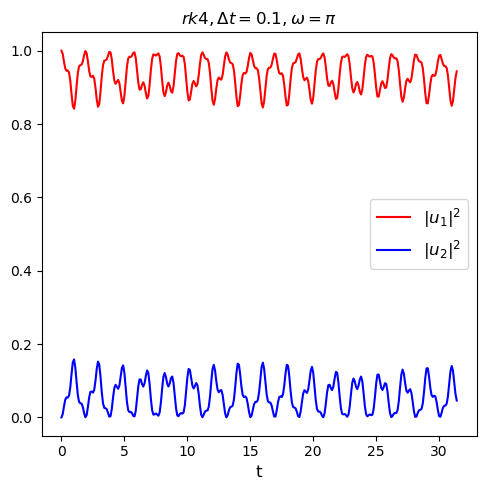

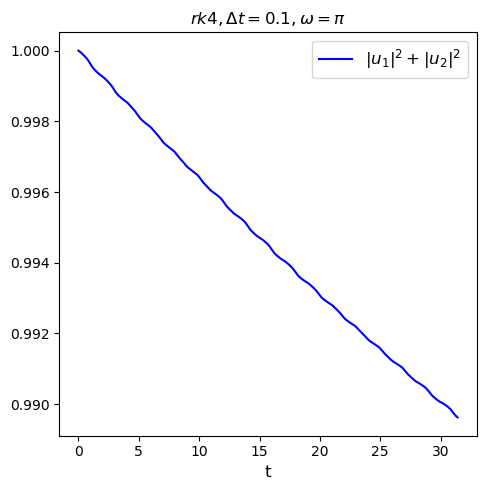

PyObject <matplotlib.legend.Legend object at 0x7f9c074bef28>

In [1]:
using LinearAlgebra

function func(u,t,Omega,Omega0,w)
    return [-im*Omega*cos.(w*t)*u[2],
        -im*(Omega0*u[2]+Omega*cos.(w*t)*u[1])]
end

function rk4(N,T,u0,Omega,Omega0,w)
    dt = T/N
    u = zeros(ComplexF64,2,N+1)
    t = collect(0:N)*dt
    u[:,1] = u0
    for i = 1 : N
        uc = vec(u[:,i])
        tc = t[i]
        k1 = func(uc,tc,Omega,Omega0,w)
        k2 = func(uc+0.5*dt*k1,tc+0.5*dt,Omega,Omega0,w)
        k3 = func(uc+0.5*dt*k2,tc+0.5*dt,Omega,Omega0,w)
        k4 = func(uc+dt*k3,tc+dt,Omega,Omega0,w)
        u[:,i+1] = uc + dt/6.0*(k1+2.0*k2+2.0*k3+k4)
    end
    return u
end



using PyPlot

##############################
T = 10.0*pi
dt = 0.1
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)


figure(1,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.1,\omega=\pi")
figure(2,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2),"b-",label=L"$|u_1|^2+|u_2|^2$")
xlabel("t")
title(L"rk4,\Delta t=0.1,\omega=\pi")
legend()


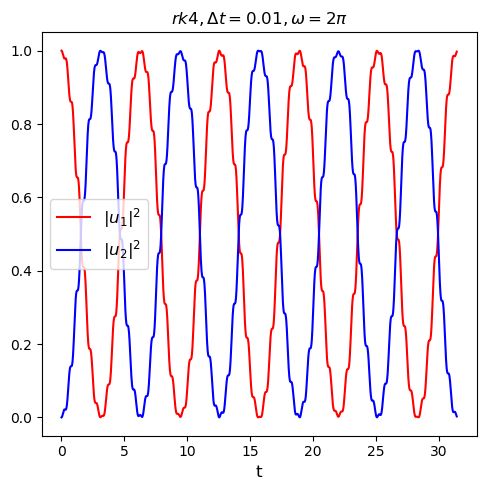

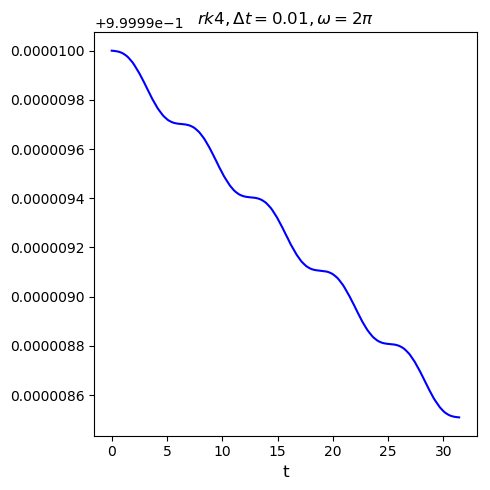

PyObject Text(0.5,1,'$rk4,\\Delta t=0.01,\\omega=2\\pi$')

In [2]:
##############################
T = 10.0*pi
dt = 0.01
N = round(Int64,T/dt)
t = collect(0:N)*dt
Omega = 1.0
Omega0 = 2*pi
w = 2*pi
u0 = [1.0,0.0]

# RK4
u = rk4(N,T,u0,Omega,Omega0,w)
figure(3,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2),"r-",label=L"|u_1|^2")
plot(t,vec(abs.(u[2,:]).^2),"b-",label=L"|u_2|^2")
xlabel("t")
legend()
title(L"rk4,\Delta t=0.01,\omega=2\pi")
figure(4,figsize=(5,5))
plot(t,vec(abs.(u[1,:]).^2+abs.(u[2,:]).^2),"b-",label=L"|u_1|^2+|u_2|^2")
xlabel("t")
title(L"rk4,\Delta t=0.01,\omega=2\pi")

To prove $A(t)$ is conserved, take the derivative use the given equations.
\begin{align*}
\partial_t A(t)
=\; &\partial_t\big( \overline{u_1}u_1 + \overline{u_2}u_2\big) = \partial_t \overline{u_1}u_1 + \overline{u_1}\partial_t u_1 + \partial_t\overline{u_2}u_2 + \overline{u_2}\partial_t u_2\\
=\; &\overline{\partial_t u_1}u_1 + \overline{u_1}\partial_t u_1 + \overline{\partial_t u_2}u_2 + \overline{u_2}\partial_t u_2\\
=\; &\overline{-i \cdot \Omega \cos (\omega t) u_2}u_1 + \overline{u_1}(-i \cdot \Omega \cos (\omega t) u_2) + \overline{-i \cdot \Omega_0 u_2 + (-i)\cdot\Omega \cos (\omega t) u_1}u_2 + \overline{u_2}\Big[(-i)\cdot\Omega_0 u_2 + (-i) \cdot \Omega \cos (\omega t) u_1\Big]\\
=\; &0
\end{align*}

## Problem 4


Consider the heat equation in 1D with periodic boundary conditions

$$u_t(x,t) = u_{xx}(x,t),\quad x\in [0,2\pi],$$

$$u(x,0)=e^{-5(x-\pi)^2}, \quad u(0,t)=u(2\pi,t), u_x(0,t)=u_x(2\pi,t)$$

Use the central finite difference scheme to discretize $u_{xx}(x,t)$, with a uniform grid spacing $\Delta x=2\pi/100$, i.e.

$$u_{xx}(x_i,t_n)\approx \frac{u(x_i+\Delta x,t_n)-2u(x_i,t_n)+u(x_i-\Delta x,t_n)}{\Delta x^2}.$$



Obtain the solution $u(x,T)$ at $T=1.0$ using the following methods.

a) Implement a `ForwardEuler` method, using the forward Euler for time discretization and $h =0.001$. What would happen if you use a time step $h=0.01$?

b) Implement a `Trapezoid` method, using a trapezoidal rule for time discretization and use $h=0.1$. Since the equation is linear, you can solve a linear equation to treat this implicit scheme. Think about why the trapezoid method can use a much larger time step.

c) Implement a `TrapezoidAB2` method, which uses an adaptive time stepping strategy (with the "Milne device") propagated by the trapezoidal rule, with its error estimated on-the-fly from the Adams-Bashforth 2nd order scheme.  The initial time step is $h=0.001$. Plot out the history of the size step along the history of the simulation. 

Read [Ise] Chap 6.2 if needed for more information. Some "sloppiness" in the interpolation procedure can be tolerated if it makes the implementation easier.

**Note**: You should implement this example using **sparse matrices** whenever possible. See 

https://docs.julialang.org/en/v1/stdlib/SparseArrays/index.html

for references on sparse linear algebra.


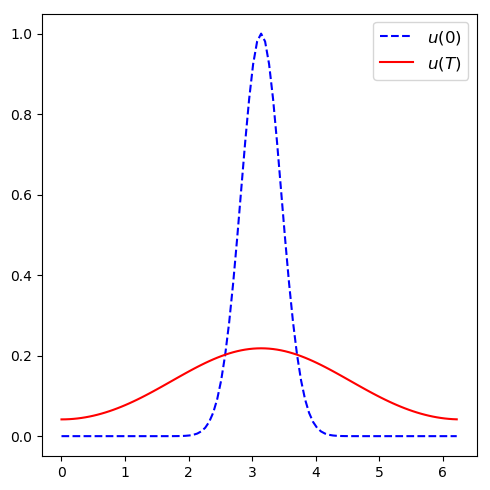

PyObject <matplotlib.legend.Legend object at 0x7f9c02dfaa20>

In [3]:
using SparseArrays

function ForwardEuler(N,T,u0,A)
    dt = T/N
    Ns = length(u0)
    @assert(Ns == size(A,1) && Ns == size(A,2))
    u = copy(u0)
    t = collect(0:N)*dt
    for i = 1 : N
        u = u + A * dt * u
    end
    return u
end

Ls = 2*pi
Ns = 100
hs = Ls / Ns
xs = collect(0:Ns-1)*hs

A = 1.0/hs^2 * spdiagm(-1=>ones(Ns-1),0=>-2.0*ones(Ns),1=>ones(Ns-1))
A[1,Ns] = 1.0 / hs^2
A[Ns,1] = 1.0 / hs^2
u0 = exp.(-5.0*(xs .- pi).^2)

T  = 1.0
dt = 0.001
N  = round(Int64,T/dt)
t  = collect(0:N)*dt

uT = ForwardEuler(N,T,u0,A)

using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(u0),"b--",label=L"u(0)")
plot(xs,vec(uT),"r-",label=L"u(T)")
legend()

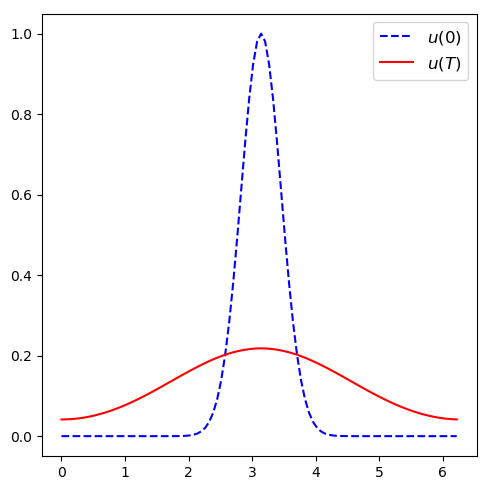

PyObject <matplotlib.legend.Legend object at 0x7f9c02cab630>

In [4]:
function Trapezoid(N,T,u0,A)
    dt = T/N
    Ns = length(u0)
    I_Ns = sparse(1.0I, Ns, Ns)
    @assert(Ns == size(A,1) && Ns == size(A,2))
    u = copy(u0)
    t = zeros(N+1)
    t = collect(0:N)*dt
    
    A1 = I_Ns + 0.5*dt*A
    A2 = I_Ns - 0.5*dt*A
    
    for i = 1 : N
        u = A2 \ (A1*u)
    end
    return u
end

Ls = 2*pi
Ns = 100
hs = Ls / Ns
xs = collect(0:Ns-1)*hs

A = 1.0/hs^2 * spdiagm(-1=>ones(Ns-1),0=>-2.0*ones(Ns),1=>ones(Ns-1))
A[1,Ns] = 1.0 / hs^2
A[Ns,1] = 1.0 / hs^2
u0 = exp.(-5.0*(xs .- pi).^2)

T  = 1.0
dt = 0.1
N  = round(Int64,T/dt)
t  = collect(0:N)*dt

uT = Trapezoid(N,T,u0,A)

using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(u0),"b--",label=L"u(0)")
plot(xs,vec(uT),"r-",label=L"u(T)")
legend()

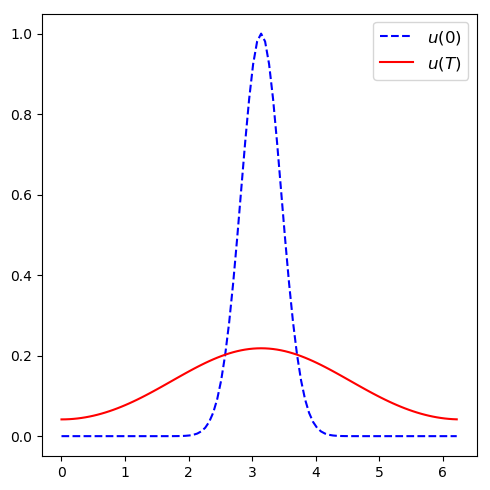

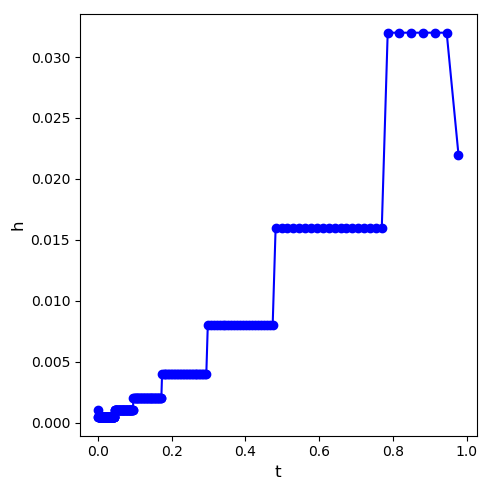

PyObject Text(25,0.5,'h')

In [5]:
function TrapezoidAB2(T,dt0,u0,A,delta)
    dt = T/N
    Ns = length(u0)
    I_Ns = sparse(1.0I,Ns,Ns)
    @assert(Ns == size(A,1) && Ns == size(A,2))
    u = copy(u0)
    y = copy(u0)
    uHist = zeros(Ns,2)
    fHist = zeros(Ns,2)
    uHist[:,1] = copy(u0)
    uHist[:,2] = copy(u0)
    fHist[:,1] = A*u0
    fHist[:,2] = A*u0
    
    
    t = 0.0;
    tHist = [t];
    dt = dt0

    u = (I_Ns - 0.5*dt*A) \ ((I_Ns + 0.5*dt*A)*u)
    t += dt
    append!(tHist,t)
    
    # update history
    uHist[:,1] = copy(u)
    fHist[:,1] = A*u
    
    doubleDtFlag = false

    while(t < T)

        if( t + dt >= T )
            # propagate and stop
            dt = T-t
            append!(tHist,T)
            u = (I_Ns - 0.5*dt*A) \ ((I_Ns + 0.5*dt*A)*u)

            break
        end
        
        # propagate and compute error
        u = (I_Ns - 0.5*dt*A) \ ((I_Ns + 0.5*dt*A)*u)
        y = uHist[:,1] + dt*(1.5*fHist[:,1] - 0.5*fHist[:,2])
        kappa = norm(u - y)
#         println(norm(A*uHist[:,2]-fHist[:,2]))
#         println("u = ", u[div(Ns,2)], ", y = ", y[div(Ns,2)], ", kappa = ", kappa)
        if( kappa <= 0.6 * dt * delta && doubleDtFlag == false )
            # Advance
            t = t + dt
            append!(tHist,t)
            uHist[:,1] = copy(u)
            fHist[:,1] = A*u
            # Do not update uHist[:,2] when doubling the time step

            # Avoid continuous doubling of the time step since there is not enough history
            dt = dt * 2.0

            doubleDtFlag = true
        elseif( kappa > 6 * dt * delta)
            # halve the step size. Do not advance
            u = copy(uHist[:,1])
            dt = dt * 0.5

            uHist[:,2] = (I_Ns - 0.5*dt*A) \ ((I_Ns + 0.5*dt*A)*uHist[:,2])

            fHist[:,2] = A*uHist[:,2]
        else
            # Advance
            
            t = t + dt
            append!(tHist,t)
            uHist[:,2] = copy(uHist[:,1])
            fHist[:,2] = copy(fHist[:,1])
            uHist[:,1] = copy(u)
            fHist[:,1] = A*u    
            doubleDtFlag = false
        end
        if( dt < 1e-5 )
            break
        end
    end

    return u,tHist
end

Ls = 2*pi
Ns = 100
hs = Ls / Ns
xs = collect(0:Ns-1)*hs

A = 1.0/hs^2 * spdiagm(-1=>ones(Ns-1),0=>-2.0*ones(Ns),1=>ones(Ns-1))
A[1,Ns] = 1.0 / hs^2
A[Ns,1] = 1.0 / hs^2
u0 = exp.(-5.0*(xs .- pi).^2)

T  = 1.0
dt0 = 0.001
delta = 1e-3

uT,tHist = TrapezoidAB2(T,dt0,u0,A,delta)

using PyPlot
figure(1,figsize=(5,5))
plot(xs,vec(u0),"b--",label=L"u(0)")
plot(xs,vec(uT),"r-",label=L"u(T)")
legend()

figure(2,figsize=(5,5))
plot(tHist[1:end-1],diff(tHist),"b-o")
xlabel("t")
ylabel("h")